## practice 1

In [1]:
import re
import pandas as pd
import os
import numpy as np

In [2]:
with open ('cisi_dataset/CISI.ALL') as f:
    data = f.read()
    raw_docs = [
            re.split(r"\.I\n|\.T\n|\.A\n|\.W\n|\.X\n|\n.T +\n|\n.A +\n|\n.W +\n", d)
            for d in data.split(".I ")
            if d
        ]
docs = []
for d in raw_docs:
    d = [s.replace('\n', '') for s in d]
    if len(d) != 5:
        d[2] = ' '.join(d[2:len(d)-2]).replace('\n', '')
    docs.append(
            {
                "id": int(d[0]),
                "title": d[1].strip(),
                "author": d[2].strip(),
                "text": d[-2].strip(),
                "related_texts": [
                    tuple(rel.split("\t")) for rel in d[-1].split(" ") if rel
                ],
            }
        )
docs = pd.DataFrame(docs)

In [3]:
docs

,id,title,author,text,related_texts
0,1,18 Editions of the Dewey Decimal Classifications,"Comaromi, J.P.",The present study is a history of the DEWEY De...,"[(1, 5, 192, 1, 1262, 1, 1556, 1, 11004, 1, 11..."
1,2,Use Made of Technical Libraries,"Slater, M.",This report is an analysis of 6300 acts of use...,"[(2, 5, 232, 1, 276, 1, 2132, 1, 2137, 1, 2139..."
2,3,Two Kinds of PowerAn Essay on Bibliographic Co...,"Wilson, P.",The relationships between the organization and...,"[(3, 7, 342, 1, 3172, 1, 3268, 1, 3292, 1, 332..."
3,4,Systems Analysis of a University Library; fina...,"Buckland, M.K.",The establishment of nine new universities in ...,"[(4, 10, 45, 2, 49, 1, 432, 1, 465, 1, 496, 1,..."
4,5,A Library Management Game:a report on a resear...,"Brophy, P.",Although the use of games in professional educ...,"[(4, 2, 55, 6, 590, 1, 591, 1, 5115, 1, 5158, ..."
...,...,...,...,...,...
1455,1456,World Dynamics,"Forrester, J.W.",Over the last several decades interest in econ...,"[(350, 1, 1456435, 1, 14561025, 1, 14561402, 1..."
1456,1457,World Trends in Library Education,"Bramley, G.",One of the most significant aspects of the evo...,"[(128, 1, 1457130, 1, 1457191, 1, 1457339, 1, ..."
1457,1458,Legal Restrictions on Exploitation of the Pate...,"Baxter, W.A.",The patent laws confer on a patentee power to ...,"[(1458, 5, 14581458, 5, 1458)]"
1458,1459,Language and Thought,"Poluskin, V.A.",This book considers the basic aspects of this ...,"[(362, 1, 1459585, 1, 14591093, 1, 14591107, 1..."


#### with classes

In [4]:
from data import CISIData

In [5]:
data = CISIData('cisi_dataset')

In [6]:
data.documents.head()

,id,title,author,text,related_texts
0,1,18 Editions of the Dewey Decimal Classifications,"Comaromi, J.P.",The present study is a history of the DEWEY De...,"[(1, 5, 192, 1, 1262, 1, 1556, 1, 11004, 1, 11..."
1,2,Use Made of Technical Libraries,"Slater, M.",This report is an analysis of 6300 acts of use...,"[(2, 5, 232, 1, 276, 1, 2132, 1, 2137, 1, 2139..."
2,3,Two Kinds of PowerAn Essay on Bibliographic Co...,"Wilson, P.",The relationships between the organization and...,"[(3, 7, 342, 1, 3172, 1, 3268, 1, 3292, 1, 332..."
3,4,Systems Analysis of a University Library; fina...,"Buckland, M.K.",The establishment of nine new universities in ...,"[(4, 10, 45, 2, 49, 1, 432, 1, 465, 1, 496, 1,..."
4,5,A Library Management Game:a report on a resear...,"Brophy, P.",Although the use of games in professional educ...,"[(4, 2, 55, 6, 590, 1, 591, 1, 5115, 1, 5158, ..."


In [7]:
data.documents['author'].value_counts()

author
Lancaster, F.W.                          8
Salton, G.                               7
Line, M.B.                               6
Brookes, B. C.                           6
Kilgour, F.G.                            5
                                        ..
Tell, Bjorn V.                           1
Thiel, L. H.Heaps, H. S.                 1
Williams, Martha E.                      1
Garvey, William D.Griffith, Belver C.    1
Poluskin, V.A.                           1
Name: count, Length: 1231, dtype: int64

In [8]:
data.documents.loc[data.documents['author'] == 'Lancaster, F.W.']

,id,title,author,text,related_texts
74,75,MEDLARS: Report on the Evaluation of Its Opera...,"Lancaster, F.W.",A comprehensive program to evaluate the perfor...,"[(24, 3, 7530, 1, 7538, 1, 7543, 1, 7547, 1, 7..."
193,194,The Evaluation of Published Indexes and Abstra...,"Lancaster, F.W.",This paper describes possible criteria by whic...,"[(86, 1, 194114, 1, 194154, 1, 194172, 1, 1941..."
450,451,Interaction Between Requesters and a Large Mec...,"Lancaster, F.W.","In a large mechanized retrieval system, a cert...","[(29, 2, 45158, 3, 45166, 1, 451124, 1, 451127..."
457,458,Information Retrieval Systems,"Lancaster, F.W.","This book is concerned primarily with those ""i...","[(29, 1, 45839, 1, 45851, 1, 45857, 1, 45861, ..."
458,459,Information Retrieval On-Line,"Lancaster, F.W.",This book deals with on-line systems for bibli...,"[(10, 1, 45918, 3, 45961, 1, 459114, 1, 459120..."
590,591,The Cost-Effectiveness Analysis of Information...,"Lancaster, F.W.",A distinction is made between cost-effectivene...,"[(18, 1, 59127, 1, 59134, 1, 59149, 1, 59153, ..."
827,828,A Study of Current Awareness Publications in t...,"Lancaster, F.W.",Mailed questionnaires were used to study the u...,"[(10, 1, 82818, 1, 82834, 1, 82849, 1, 82853, ..."
1447,1448,Vocabulary Control for Information Retrieval,"Lancaster, F.W.",This book deals with properties of vocabularie...,"[(30, 1, 144834, 1, 144838, 1, 144873, 1, 1448..."


## practice 2

In [9]:
data = pd.read_csv('./spotify_data.csv', sep = ',')

In [10]:
data

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [11]:
data.shape

(2500, 3)

In [12]:
data.dtypes

Songs & Artist     object
Streams             int64
Daily             float64
dtype: object

In [13]:
data.describe() # works only with continuos variables

,Streams,Daily
count,2.500000e+03,2.498000e+03
mean,9.381437e+08,5.044663e+05
std,4.788772e+08,4.963328e+05
min,5.052491e+08,7.523000e+03
25%,6.099077e+08,2.245135e+05
50%,7.628053e+08,3.763570e+05
75%,1.096878e+09,6.318060e+05
max,4.463659e+09,7.553534e+06


In [14]:
data.describe(include='all')

,Songs & Artist,Streams,Daily
count,2500,2.500000e+03,2.498000e+03
unique,2474,NaN,NaN
top,Super Yei - La Forma en Que Me Miras,NaN,NaN
freq,2,NaN,NaN
mean,NaN,9.381437e+08,5.044663e+05
std,NaN,4.788772e+08,4.963328e+05
min,NaN,5.052491e+08,7.523000e+03
25%,NaN,6.099077e+08,2.245135e+05
50%,NaN,7.628053e+08,3.763570e+05
75%,NaN,1.096878e+09,6.318060e+05


In [15]:
data['Streams'] # this will be a pandas series

0       4463658617
1       4018102402
2       3588673578
3       3544187311
4       3518744128
           ...    
2495     505592800
2496     505511969
2497     505386377
2498     505309100
2499     505249124
Name: Streams, Length: 2500, dtype: int64

In [16]:
data['Streams'].shape

(2500,)

In [17]:
data.columns

Index(['Songs & Artist', 'Streams', 'Daily'], dtype='object')

In [18]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

In [19]:
sum(data.duplicated()) # how many duplicates i have in my dataset ? in this case zero

0

In [20]:
data[data.duplicated(subset=['Songs & Artist'], keep=False)]

,Songs & Artist,Streams,Daily
43,The Weeknd - Die For You,2424085403,1667707.0
78,Dua Lipa - Levitating,2154284982,893251.0
85,The Weeknd - Save Your Tears,2106540115,999562.0
152,Sia - Cheap Thrills,1816755550,361118.0
163,Luis Fonsi - Despacito,1800662716,555695.0
183,Luis Fonsi - Despacito,1739696575,246341.0
230,The Weeknd - Save Your Tears,1641748842,751787.0
232,Ed Sheeran - Shivers,1641091438,576659.0
266,Lil Nas X - Old Town Road,1549228839,206616.0
298,Coldplay - Hymn for the Weekend,1496256559,1056203.0


In [21]:
data.drop_duplicates(subset='Songs & Artist') # so we are going to remove the duplicates of the variable 'Songs & Artist'

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)
Return DataFrame with duplicate rows removed.

Parameters:
- subsetcolumn label or sequence of labels, optional
- Only consider certain columns for identifying duplicates, by default use all of the columns.

keep{‘first’, ‘last’, False}, default ‘first’
Determines which duplicates (if any) to keep.

- ‘first’ : Drop duplicates except for the first occurrence.

- ‘last’ : Drop duplicates except for the last occurrence.

- False : Drop all duplicates.

inplacebool, default False
Whether to modify the DataFrame rather than creating a new one.

ignore_indexbool, default False
If True, the resulting axis will be labeled 0, 1, …, n - 1.

In [22]:
data.drop_duplicates(subset='Songs & Artist', keep = 'first')

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [23]:
data.isna()

,Songs & Artist,Streams,Daily
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2495,False,False,False
2496,False,False,False
2497,False,False,False
2498,False,False,False


DataFrame.dropna(*, axis=0, how=<no_default>, thresh=<no_default>, subset=None, inplace=False, ignore_index=False)[source]
Remove missing values.

Parameters:
axis{0 or ‘index’, 1 or ‘columns’}, default 0
Determine if rows or columns which contain missing values are removed.

- 0, or ‘index’ : Drop rows which contain missing values.

- 1, or ‘columns’ : Drop columns which contain missing value.

Only a single axis is allowed.

how{‘any’, ‘all’}, default ‘any’
Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.

- ‘any’ : If any NA values are present, drop that row or column.

- ‘all’ : If all values are NA, drop that row or column.

threshint, optional
Require that many non-NA values. Cannot be combined with how.

subsetcolumn label or sequence of labels, optional
Labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include.

inplacebool, default False
Whether to modify the DataFrame rather than creating a new one.

ignore_indexbool, default False
If True, the resulting axis will be labeled 0, 1, …, n - 1.

In [24]:
data.dropna(how='any', axis = 0) # 0 means rows whiel 1 means columns

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [25]:
data.dropna(inplace=True) # is equal to data = data.dropna()

In [26]:
data

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [27]:
data.drop_duplicates(subset='Songs & Artist', inplace=True)

In [28]:
data # dataset without missing values and duplicates

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [29]:
data['Daily'].dtype

dtype('float64')

In [30]:
data['Daily'] = data['Daily'].astype(int)

In [31]:
data['Daily'].dtype

dtype('int32')

In [32]:
data

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447
1,Ed Sheeran - Shape of You,4018102402,1001507
2,Lewis Capaldi - Someone You Loved,3588673578,1506961
3,Harry Styles - As It Was,3544187311,1611374
4,Post Malone - Sunflower,3518744128,1337404
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450
2496,Social House - Magic In The Hamptons,505511969,118483
2497,KISS - Rock And Roll All Nite,505386377,205701
2498,Mora - 512,505309100,280336


In [33]:
data['Songs & Artist'].str.split(' - ', n=1, expand=True)

,0,1
0,The Weeknd,Blinding Lights
1,Ed Sheeran,Shape of You
2,Lewis Capaldi,Someone You Loved
3,Harry Styles,As It Was
4,Post Malone,Sunflower
...,...,...
2495,Myke Towers,LA FALDA
2496,Social House,Magic In The Hamptons
2497,KISS,Rock And Roll All Nite
2498,Mora,512


In [34]:
data[['artist','song']] = data['Songs & Artist'].str.split(' - ', n=1, expand=True)

In [35]:
data = data.drop('Songs & Artist', axis=1)

In [36]:
data

,Streams,Daily,artist,song
0,4463658617,1619447,The Weeknd,Blinding Lights
1,4018102402,1001507,Ed Sheeran,Shape of You
2,3588673578,1506961,Lewis Capaldi,Someone You Loved
3,3544187311,1611374,Harry Styles,As It Was
4,3518744128,1337404,Post Malone,Sunflower
...,...,...,...,...
2495,505592800,1278450,Myke Towers,LA FALDA
2496,505511969,118483,Social House,Magic In The Hamptons
2497,505386377,205701,KISS,Rock And Roll All Nite
2498,505309100,280336,Mora,512


In [37]:
data = data.rename(columns={'Streams': 'streams', 'Daily': 'daily'})

In [38]:
data['artist'].value_counts()

artist
Taylor Swift      41
Bad Bunny         36
Drake             33
Billie Eilish     26
The Weeknd        24
                  ..
Sub Urban          1
Arizona Zervas     1
*NSYNC             1
Don McLean         1
Social House       1
Name: count, Length: 993, dtype: int64

In [39]:
data.loc[data['artist'] == 'Taylor Swift']

,streams,daily,artist,song
39,2481542457,2271270,Taylor Swift,Cruel Summer
128,1909046390,674338,Taylor Swift,Blank Space
221,1663786298,786091,Taylor Swift,Anti-Hero
274,1539880718,1035606,Taylor Swift,Lover
311,1479530912,604852,Taylor Swift,Shake It Off
344,1421155316,1072449,Taylor Swift,cardigan
445,1275999844,497318,Taylor Swift,Style
462,1243764603,1298139,Taylor Swift,august
487,1216808688,837279,Taylor Swift,Don’t Blame Me
498,1207381259,431873,Taylor Swift,Look What You Made Me Do


In [40]:
data.groupby('artist').agg({'streams': 'sum', 'daily': 'mean', 'song': 'count'})

,streams,daily,song
artist,,,
$uicideboy$,1907960731,3.128140e+05,3
*NSYNC,766218771,2.538110e+06,1
21 Savage,5396315964,4.778884e+05,7
24kGoldn,1934675271,5.836910e+05,1
2Pac,3417713717,3.690510e+05,5
...,...,...,...
t.A.T.u.,572476768,2.885880e+05,1
will.i.am,802953468,3.425480e+05,1
zzoilo,720665392,2.896740e+05,1


In [41]:
ranked_artist = data.groupby('artist').agg({'streams': 'sum', 'daily': 'mean', 'song': 'count'})

In [42]:
ranked_artist.to_csv('ranked_artist.csv')

## practice 3

In [43]:
a = [2,65,3,42,2,65,1,2,3,7]

In [44]:
min(a)

1

In [45]:
max(a)

65

In [46]:
np.mean(a)

19.2

In [47]:
abs(-18)

18

In [48]:
4/2

2.0

In [49]:
4//2

2

In [50]:
5%2 # gives back the reminder of the division

1

### math package

In [51]:
import math

In [52]:
math.ceil(2.6)

3

In [53]:
round(2.6)

3

In [54]:
math.log(2)

0.6931471805599453

In [55]:
math.log10(2)

0.3010299956639812

In [56]:
math.log2(2)

1.0

### numpy package

In [57]:
a = np.array([2,65,3,42,2,65,1,2,3,7])

In [58]:
type(a)

numpy.ndarray

In [59]:
a.ndim

1

In [60]:
a.dtype

dtype('int32')

In [61]:
A = np.array(([1,2,3], [4,5,6]))

In [62]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [63]:
np.ndim(A)

2

In [64]:
B = np.array(([1,2,3], [4,5,6], [7,8,9]))

In [65]:
B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [66]:
np.ndim(B)

2

In [67]:
A.shape

(2, 3)

In [68]:
B.shape

(3, 3)

In [69]:
np.arange(0, 10) # we get back a numpy array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [71]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [72]:
np.zeros((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [73]:
np.empty((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [74]:
np.random.choice([1,2,3,4,5,6,7,8,9], replace=False)

3

In [75]:
np.random.normal(0, 1, 10)

array([ 0.51569727, -0.38065602,  0.50750914,  0.34986652, -0.56592731,
       -0.32511058, -1.36347179,  0.57406815,  0.09665855,  0.34223378])

In [76]:
np.random.randint(1, 100)

75

In [77]:
np.random.seed(42) # the sequence of values we get will be always the same

In [78]:
A.T # transpose

array([[1, 4],
       [2, 5],
       [3, 6]])

In [79]:
A.reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [80]:
B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## practise 4

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = [1, 2, 3]
y = [4, 7, 11]

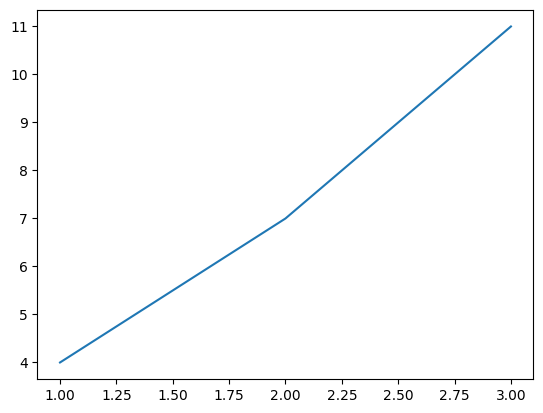

In [4]:
plt.plot(x, y)
plt.show()

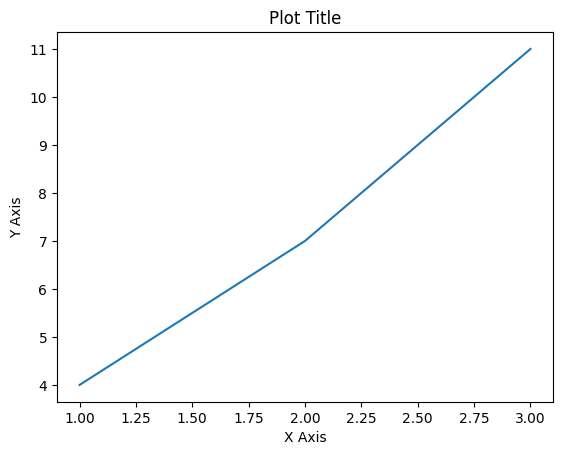

In [5]:
figure, axes = plt.subplots() # axes
axes.plot(x, y)
axes.set_xlabel("X Axis") # axis
axes.set_ylabel("Y Axis")
axes.set_title("Plot Title")
plt.show()

In [19]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
data = pd.DataFrame(iris["data"], columns=iris["feature_names"])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


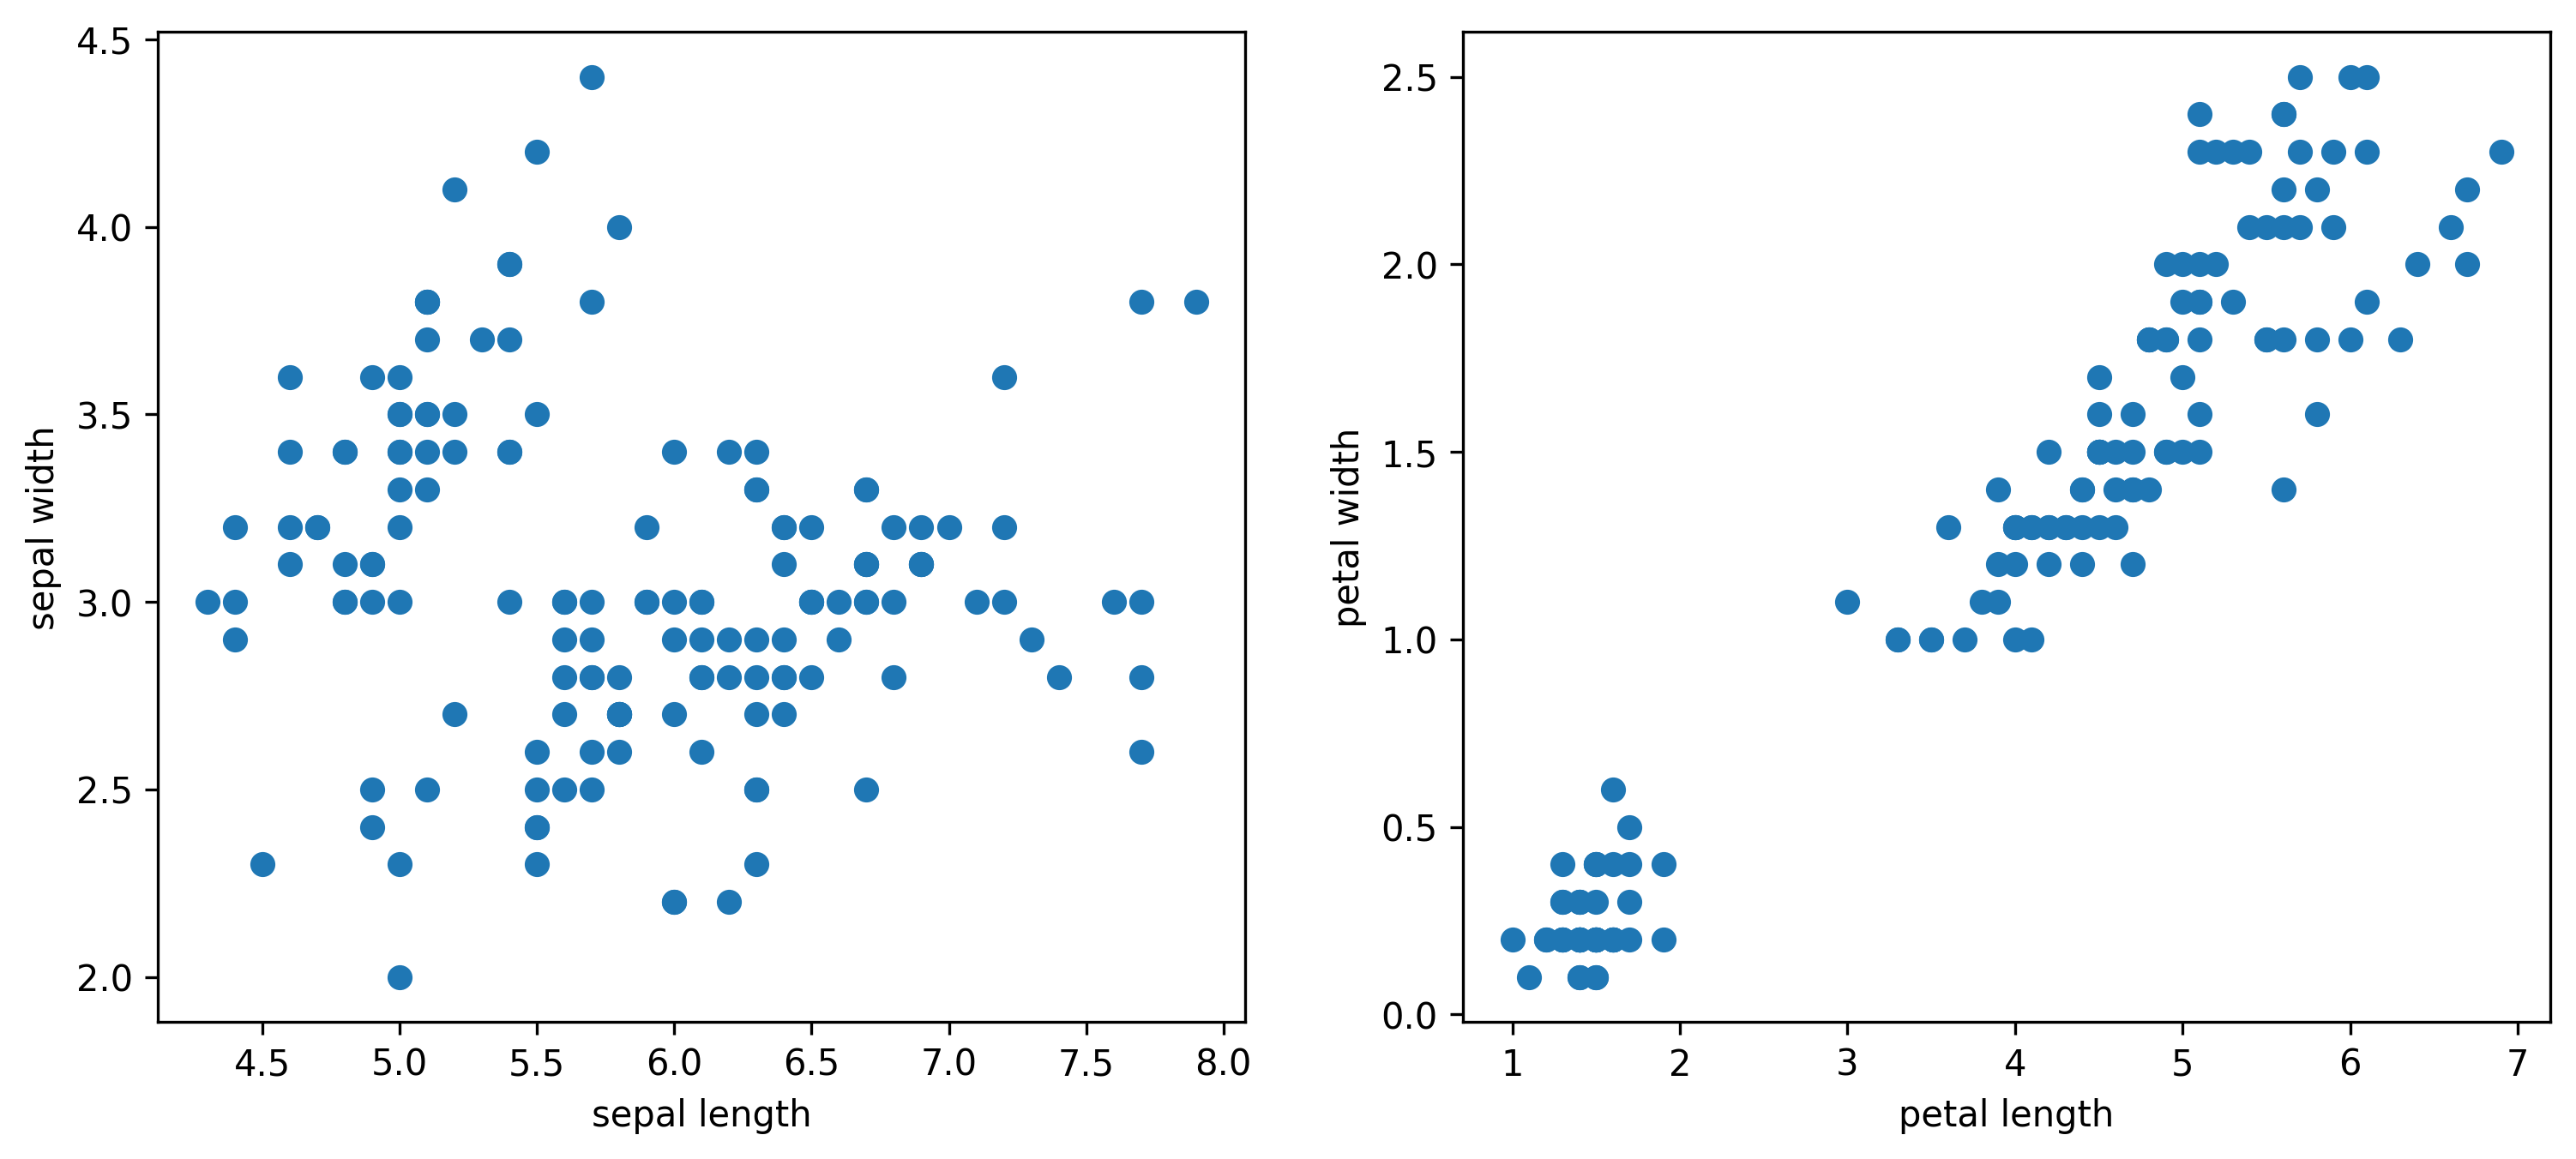

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

ax[0].scatter(data["sepal length (cm)"], data["sepal width (cm)"])
ax[0].set_xlabel("sepal length")
ax[0].set_ylabel("sepal width")

ax[1].scatter(data["petal length (cm)"], data["petal width (cm)"])
ax[1].set_xlabel("petal length")
ax[1].set_ylabel("petal width")

plt.show()

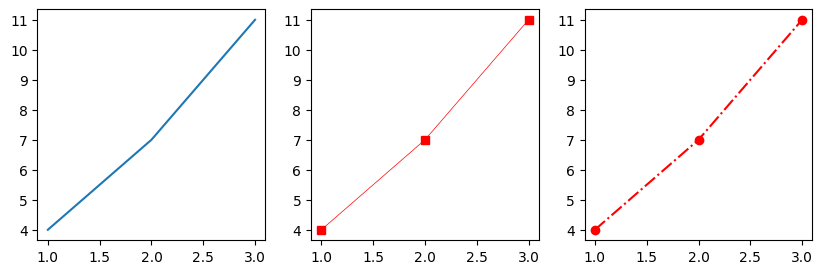

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].plot(x, y)
ax[1].plot(x, y, color="#ff0000", marker="s", linewidth=0.5)
ax[2].plot(x, y, "ro-.")
plt.show()

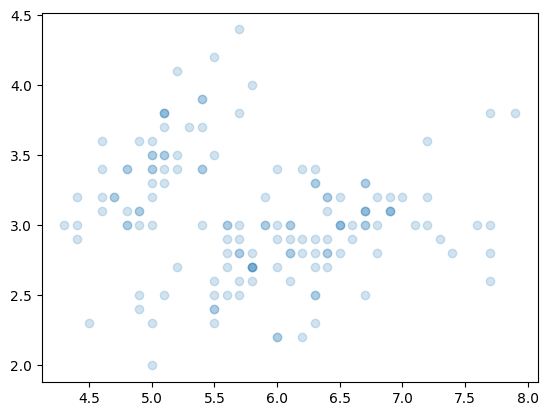

In [18]:
fig, ax = plt.subplots()

ax.scatter(data["sepal length (cm)"], data["sepal width (cm)"], alpha=0.2)
#ax.set(xlim=(0, 10), xticks=np.arange(0, 10, 0.5), ylim=(1, 5), yticks=np.arange(1, 5, 0.5))

plt.show()

In [20]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
data["target"] = iris["target"]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
avg_sepal_length = data.groupby("target").agg({"sepal length (cm)": "mean"})["sepal length (cm)"].values

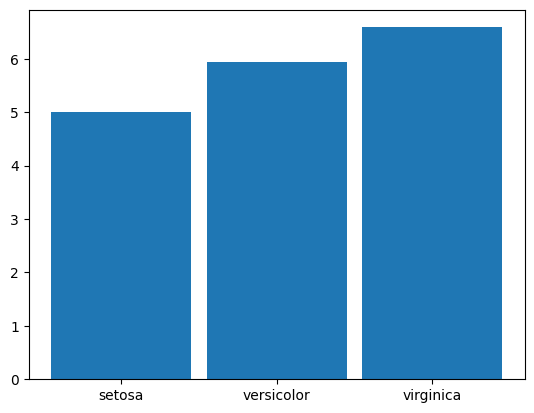

In [24]:
fig, ax = plt.subplots()
ax.bar(iris["target_names"], height=avg_sepal_length, width=0.9)
plt.show()

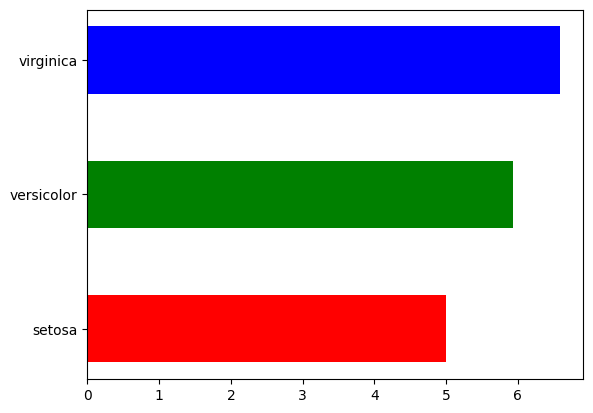

In [25]:
fig, ax = plt.subplots()
ax.barh(iris["target_names"], width=avg_sepal_length, color=["red", "green", "blue"], height=0.5)
plt.show()

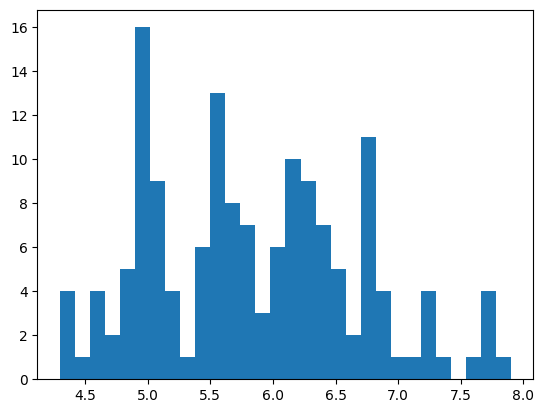

In [26]:
fig, ax = plt.subplots()
ax.hist(data["sepal length (cm)"], bins=30)
# ax.grid()
plt.show()

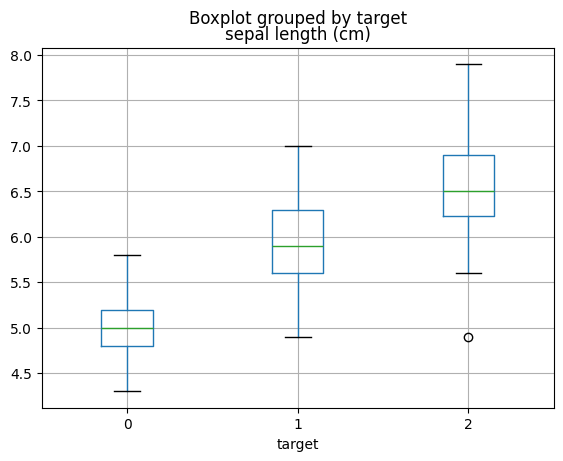

In [27]:
data.boxplot("sepal length (cm)", "target")
plt.show()

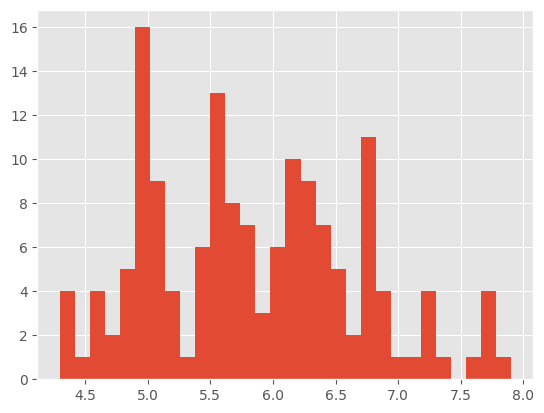

In [28]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.hist(data["sepal length (cm)"], bins=30)
# ax.grid()
plt.show()